In [3]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
df = pd.read_csv("data/restaurant_reviews_.csv")

In [5]:
df.head()

,id_review,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,restaurant_url,extracted_info,Name,Address
0,ChdDSUhNMG9nS0VJQ0FnTUNvZ2FEbjBRRRAB,Different experience Excellent service Delicio...,2 days ago,2025-04-20 10:13:22.760797,5.0,Moez Krir,9,https://www.google.com/maps/contrib/1005837949...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
1,ChZDSUhNMG9nS0VJQ0FnTUNvcVBlMVVREAE,What a hidden gem! Food and ambience of the pl...,5 days ago,2025-04-20 10:13:22.761653,5.0,Daniel Tam,70,https://www.google.com/maps/contrib/1021915399...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
2,ChdDSUhNMG9nS0VJQ0FnTURJcDgzNXZRRRAB,During our stay we had the opportunity to eat ...,6 days ago,2025-04-20 10:13:22.762593,5.0,Marion Bénard,0,https://www.google.com/maps/contrib/1100664059...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
3,ChZDSUhNMG9nS0VJQ0FnTURJMWFMalNREAE,"Always well received in this restaurant, it is...",a week ago,2025-04-20 10:13:22.763450,5.0,Adam Mahjoub,27,https://www.google.com/maps/contrib/1153712824...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"
4,ChZDSUhNMG9nS0VJQ0FnTURJd3NlT1BBEAE,Even tho I'm not a fan of French cuisine but t...,a week ago,2025-04-20 10:13:22.765343,5.0,Black Night,20,https://www.google.com/maps/contrib/1083703086...,https://www.google.com/maps/search/?api=1&quer...,"Restaurant+l'escargot+Sousse,+Tunisia",Restaurant l'escargot,"Sousse, Tunisia"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_review       2602 non-null   object 
 1   caption         1603 non-null   object 
 2   relative_date   2602 non-null   object 
 3   retrieval_date  2602 non-null   object 
 4   rating          2602 non-null   float64
 5   username        2602 non-null   object 
 6   n_review_user   2602 non-null   object 
 7   n_photo_user    2602 non-null   object 
 8   restaurant_url  2602 non-null   object 
 9   extracted_info  2602 non-null   object 
 10  Name            2602 non-null   object 
 11  Address         2590 non-null   object 
dtypes: float64(1), object(11)
memory usage: 244.1+ KB


In [6]:
# convert dates

In [7]:
def convert_relative_date_improved(relative_str, retrieval_date):
    
    relative_str = str(relative_str).lower().strip()
    try:
        if relative_str == 'a year ago':
            return retrieval_date - pd.DateOffset(years=1)
        elif relative_str == 'a month ago':
            return retrieval_date - pd.DateOffset(months=1)
        elif relative_str == 'a week ago':
            return retrieval_date - pd.DateOffset(weeks=1)
        elif relative_str == 'a day ago':
            return retrieval_date - pd.DateOffset(days=1)
        elif 'years ago' in relative_str or 'year ago' in relative_str:
            years = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(years=years)
        elif 'months ago' in relative_str or 'month ago' in relative_str:
            months = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(months=months)
        elif 'weeks ago' in relative_str or 'week ago' in relative_str:
            weeks = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(weeks=weeks)
        elif 'days ago' in relative_str or 'day ago' in relative_str:
            days = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(days=days)
        elif 'hours ago' in relative_str or 'hour ago' in relative_str:
            hours = int(relative_str.split()[0])
            return retrieval_date - pd.DateOffset(hours=hours)
        elif relative_str == 'yesterday':
            return retrieval_date - pd.DateOffset(days=1)
        elif relative_str == 'today':
            return retrieval_date
        else:
            return pd.to_datetime(relative_str, errors='coerce')
    except:
        return pd.NaT

df['retrieval_date'] = pd.to_datetime(df['retrieval_date'], errors='coerce')
df['review_date'] = df.apply(lambda row: convert_relative_date_improved(row['relative_date'], row['retrieval_date']), axis=1)

In [6]:
print(f"Earliest review date: {df['review_date'].min()}")
print(f"Latest review date: {df['review_date'].max()}")

Earliest review date: 2015-04-20 11:35:37.830295
Latest review date: 2025-04-19 22:50:36.357203


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_review       2602 non-null   object        
 1   caption         1603 non-null   object        
 2   relative_date   2602 non-null   object        
 3   retrieval_date  2602 non-null   datetime64[ns]
 4   rating          2602 non-null   float64       
 5   username        2602 non-null   object        
 6   n_review_user   2602 non-null   object        
 7   n_photo_user    2602 non-null   object        
 8   restaurant_url  2602 non-null   object        
 9   extracted_info  2602 non-null   object        
 10  Name            2602 non-null   object        
 11  Address         2590 non-null   object        
 12  review_date     2602 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(10)
memory usage: 264.4+ KB


In [ ]:
# basic stats about our data:
# 222 urls : created using serpapi
# 2602 reviews: collected using googlemaps-scraper (using param --N 20)
# 999 review text is empty NaN: why ?
# first ggmaps-scraper supposed to collect 20 review per rest. so => 222*20 = 4440 review we got 2602.
# after cleaning data adding rest. names and addresses we found: 149 .
# googlemaps-scraper has removed rest. that have 0 reviews.
# but it has added in the result reivews with no comment.

In [ ]:
# how many rest. do we have.
# number of reviews by user in histogram
# 10 highest average rated rest. (in all the dataset) sorted.
# 10 highest average rated that have 5/10 reviews or more..
# 10 highest average rated from last 6 months that have 5/10 reviews or more.
# 10 lowest average rated rest. sorted
# 10 lowest average rated rest. that have 5/10 reviews or more.
# 10 lowest average rated rest. from last 6 months that have 5/10 reviews or more.

In [11]:
# how many rest.
df["Name"].nunique()

149

In [13]:
# how many user ?
df["username"].nunique()

2145

In [17]:
# how many review ?
int(df.shape[0] - df["caption"].isnull().sum())

1603

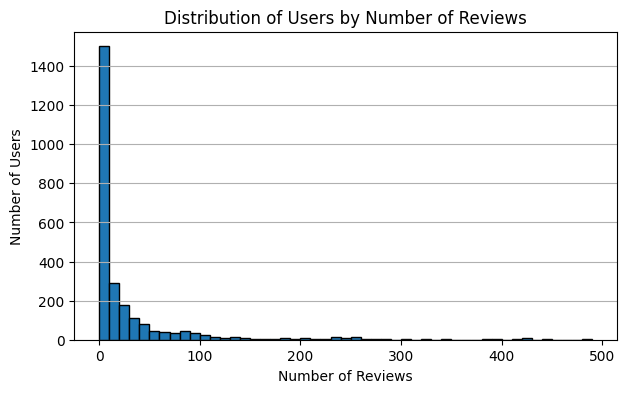

In [56]:
plt.figure(figsize=(7, 4))
plt.hist(df['n_review_user'], bins=range(0, 500, 10), edgecolor='black')  # bins of size 10

plt.title('Distribution of Users by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Users')

plt.grid(axis='y')
plt.show()

In [ ]:
# most of the users have between 1 and 10 reviews ( ~ 67% )

In [58]:
top10_avg_rating = (
    df.groupby(['Name', 'Address'])['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
    .head(10)
)

top10_avg_rating

,Name,Address,rating
63,Main Restaurant (Jaz Tour Khalef Sousse),RJX9+98X,5.0
66,Mliha Jawhara Sousse,"RJMC+564, Ave du 20 Mars 1956",5.0
34,El koujina Sousse,"RJJH+HV7, Rue Dr Moreau",5.0
32,El Mida Sousse,"RJHM+39F, Rue des Roses",5.0
108,Restaurant aloulou,"RJCP+8V3, Rue de Sakka",5.0
146,مطعم لميمَة Mia casa,RJ45+XG2 Ecole Préparatoire Essalam,5.0
61,M3ach3ch food,41 Ave Ibn Khaldoun,5.0
72,One piece Fast-Food Sousse,Rue de Constantine,5.0
136,Zembra food,"RJHP+QJ6, Rue du Professeur Roux",5.0
116,Restaurant le rwa,"RJHR+VF8, Rue Cairo",5.0


In [ ]:
# filter out restaurants with less than 10 reviews

In [65]:
review_counts = df.groupby('Name').size()
valid_names = review_counts[review_counts >= 10].index
top10_avg_rating_filtered = (
    df[df['Name'].isin(valid_names)]
    .groupby(['Name', 'Address'])['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
    .head(10)
)
top10_avg_rating_filtered

,Name,Address,rating
112,Épicerie fine - Tout un Fromage - Sousse,Rue Des Khalifes,5.000000
64,Restaurant Café Seles,RJGP+22,4.950000
48,Le poisson d'or,Rue Avicenne,4.950000
92,Restaurant le Titanic,"Hammam Sousse, Tunisia",4.950000
9,CAVIAR,Rue Imam Boukhari,4.900000
76,Restaurant Le Mediterranee,"Hammam Sousse, Tunisia",4.850000
25,Dell'Arte (Spaghetti House),RJJQ+GC7,4.850000
69,Restaurant Fricassé Taher,"Hammam Sousse, Tunisia",4.800000
29,FORUM GRILL,"RJPQ+63Q, Ave Hedi Chaker",4.789474
1,ANBAR Restaurant مطعم عنبر,Rue des Palmiers,4.750000


In [69]:
# recent reviews
six_months_ago = df["retrieval_date"].min() - pd.DateOffset(months=6)  # roughly 6 months
df_recent = df[df['review_date'] >= six_months_ago]

# filter out restaurant with less than 10 rw.
review_counts = df_recent.groupby('Name').size()
valid_names = review_counts[review_counts >= 10].index

top10_avg_rating_recent = (
    df[df['Name'].isin(valid_names)]
    .groupby(['Name', 'Address'])['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=False)
    .head(10)
)
top10_avg_rating_recent

,Name,Address,rating
62,Épicerie fine - Tout un Fromage - Sousse,Rue Des Khalifes,5.00
28,Le poisson d'or,Rue Avicenne,4.95
38,Restaurant Café Seles,RJGP+22,4.95
50,Restaurant le Titanic,"Hammam Sousse, Tunisia",4.95
7,CAVIAR,Rue Imam Boukhari,4.90
43,Restaurant Le Mediterranee,"Hammam Sousse, Tunisia",4.85
14,Dell'Arte (Spaghetti House),RJJQ+GC7,4.85
1,ANBAR Restaurant مطعم عنبر,Rue des Palmiers,4.75
18,Fleur d'orient - زهرة الشرق,"En face de Statue, Habib Bourguiba",4.75
49,Restaurant l'escargot,"Sousse, Tunisia",4.75


In [70]:
#going for the lowest
lowest_avg_rating_all = (
    df.groupby('Name')['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=True)  # Sorting in ascending order for lowest ratings
    .head(10)
)
lowest_avg_rating_all

,Name,rating
10,Bosphore Kebab,1.000000
21,Chapati mohamed,1.000000
110,Restaurant bar Al Malouf مطعم المالوف,1.550000
76,Pizza in,2.000000
66,MenuTium Sousse,2.090909
19,Caruso,2.250000
6,Baguette&Baguette Vicomte,2.600000
125,Sindbad resto lounge,2.666667
106,Restaurant Nessma,2.800000
9,Bistro 73,2.850000


In [71]:
review_counts = df.groupby('Name').size()
valid_names_10_reviews = review_counts[review_counts >= 10].index

lowest_avg_rating_10_reviews = (
    df[df['Name'].isin(valid_names_10_reviews)]
    .groupby('Name')['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=True)  # Sorting in ascending order for lowest ratings
    .head(10)
)
lowest_avg_rating_10_reviews

,Name,rating
87,Restaurant bar Al Malouf مطعم المالوف,1.550000
55,MenuTium Sousse,2.090909
16,Caruso,2.250000
5,Baguette&Baguette Vicomte,2.600000
99,Sindbad resto lounge,2.666667
84,Restaurant Nessma,2.800000
50,Legend's café restaurant,2.850000
7,Bistro 73,2.850000
103,Tabouna Food,2.900000
19,Coin d'Alma,2.900000


In [72]:
six_months_ago = df["retrieval_date"].min() - pd.DateOffset(months=6)
df_recent = df[df['review_date'] >= six_months_ago]

review_counts_recent = df_recent.groupby('Name').size()
valid_names_recent_10_reviews = review_counts_recent[review_counts_recent >= 10].index

lowest_avg_rating_recent_10_reviews = (
    df_recent[df_recent['Name'].isin(valid_names_recent_10_reviews)]
    .groupby('Name')['rating']
    .mean()
    .reset_index()
    .sort_values(by='rating', ascending=True)  # Sorting in ascending order for lowest ratings
    .head(10)
)
lowest_avg_rating_recent_10_reviews

,Name,rating
9,Caruso,2.250000
5,Bistro 73,2.727273
30,Legend's café restaurant,2.850000
11,Coin d'Alma,2.900000
4,Bellini Rooftop,3.000000
58,Tabouna Food,3.000000
31,Les Emirs Smokers' restaurant,3.052632
52,Restaurant القلة La Gargoulette,3.055556
64,مقهى باب المدينة,3.166667
6,Bruschetta Restaurant,3.200000


In [9]:
def label_sentiment(star_rating):
    if star_rating in [1, 2]:
        return 'negative'
    elif star_rating == 3:
        return 'neutral'
    elif star_rating in [4, 5]:
        return 'positive'
    else:
        return 'unknown'  # In case of unexpected values

# Apply the function to the 'star_rating' column
df['sentiment_label'] = df['rating'].apply(label_sentiment)

Sentiment labels based on star ratings:
   rating sentiment_label
0     5.0        positive
1     5.0        positive
2     5.0        positive
3     5.0        positive
4     5.0        positive


<Figure size 1600x700 with 0 Axes>

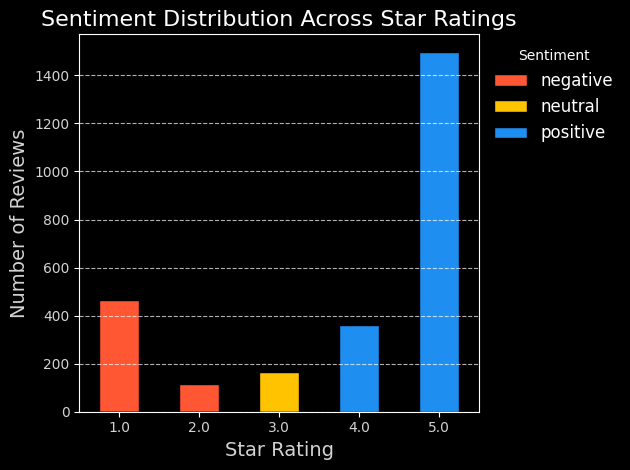

In [11]:
plt.style.use('dark_background')  # Set a style with a dark background

# Count the sentiment labels for each star rating
sentiment_counts_by_rating = df.groupby('rating')['sentiment_label'].value_counts().unstack().fillna(0)

# Plot the distribution of sentiment across star ratings
plt.figure(figsize=(16, 7))
sentiment_counts_by_rating.plot(kind='bar', stacked=True, color=['#FF5733', '#FFC300', '#1F8EF1'], edgecolor='black')
plt.title('Sentiment Distribution Across Star Ratings', fontsize=16, color='white')
plt.xlabel('Star Rating', fontsize=14, color='lightgray')
plt.ylabel('Number of Reviews', fontsize=14, color='lightgray')
plt.xticks(rotation=0, color='lightgray')
plt.yticks(color='lightgray')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentiment', fontsize=12, bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()